## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0   2.910597  1230.889883  0.142879   4.896509   176.050020
1  48.514258   208.376855  0.776684   9.173977   168.904917
2  78.041392  1625.058579  0.661633   1.022884  1078.207638
3  75.566187  1224.952225  0.620775  10.138744   764.080782
4  28.200284   281.111843  0.658685   9.333870   187.241303


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9787711	total: 58ms	remaining: 57.9s
1:	learn: 0.9695383	total: 58.4ms	remaining: 29.2s
2:	learn: 0.9591162	total: 59ms	remaining: 19.6s
3:	learn: 0.9488993	total: 59.5ms	remaining: 14.8s
4:	learn: 0.9350777	total: 60.1ms	remaining: 12s
5:	learn: 0.9243795	total: 60.8ms	remaining: 10.1s
6:	learn: 0.9126891	total: 61.4ms	remaining: 8.7s
7:	learn: 0.9008610	total: 62ms	remaining: 7.69s
8:	learn: 0.8903203	total: 62.5ms	remaining: 6.88s
9:	learn: 0.8786034	total: 63ms	remaining: 6.23s
10:	learn: 0.8687116	total: 63.5ms	remaining: 5.71s
11:	learn: 0.8559749	total: 64ms	remaining: 5.27s
12:	learn: 0.8475538	total: 64.6ms	remaining: 4.91s
13:	learn: 0.8355052	total: 65.2ms	remaining: 4.59s
14:	learn: 0.8260096	total: 65.6ms	remaining: 4.31s
15:	learn: 0.8164206	total: 66.1ms	remaining: 4.06s
16:	learn: 0.8067979	total: 66.5ms	remaining: 3.85s
17:	learn: 0.7978588	total: 67ms	remaining: 3.65s
18:	learn: 0.7908960	total: 67.5ms	remaining: 3.48s
19:	lea

117:	learn: 0.2549917	total: 108ms	remaining: 808ms
118:	learn: 0.2524057	total: 109ms	remaining: 804ms
119:	learn: 0.2490561	total: 109ms	remaining: 800ms
120:	learn: 0.2461620	total: 110ms	remaining: 796ms
121:	learn: 0.2428520	total: 110ms	remaining: 791ms
122:	learn: 0.2406402	total: 110ms	remaining: 788ms
123:	learn: 0.2377567	total: 111ms	remaining: 784ms
124:	learn: 0.2359118	total: 111ms	remaining: 779ms
125:	learn: 0.2327418	total: 112ms	remaining: 775ms
126:	learn: 0.2306904	total: 112ms	remaining: 770ms
127:	learn: 0.2284160	total: 112ms	remaining: 766ms
128:	learn: 0.2259542	total: 113ms	remaining: 762ms
129:	learn: 0.2239741	total: 113ms	remaining: 759ms
130:	learn: 0.2224332	total: 114ms	remaining: 756ms
131:	learn: 0.2204638	total: 114ms	remaining: 751ms
132:	learn: 0.2187699	total: 115ms	remaining: 748ms
133:	learn: 0.2168822	total: 115ms	remaining: 744ms
134:	learn: 0.2145230	total: 115ms	remaining: 740ms
135:	learn: 0.2126354	total: 116ms	remaining: 737ms
136:	learn: 

291:	learn: 0.0529844	total: 185ms	remaining: 450ms
292:	learn: 0.0526290	total: 186ms	remaining: 449ms
293:	learn: 0.0523980	total: 187ms	remaining: 448ms
294:	learn: 0.0520484	total: 187ms	remaining: 447ms
295:	learn: 0.0517000	total: 188ms	remaining: 446ms
296:	learn: 0.0513198	total: 188ms	remaining: 445ms
297:	learn: 0.0509733	total: 189ms	remaining: 444ms
298:	learn: 0.0505763	total: 189ms	remaining: 443ms
299:	learn: 0.0502219	total: 190ms	remaining: 442ms
300:	learn: 0.0499423	total: 190ms	remaining: 441ms
301:	learn: 0.0495848	total: 190ms	remaining: 440ms
302:	learn: 0.0492511	total: 191ms	remaining: 439ms
303:	learn: 0.0489431	total: 191ms	remaining: 438ms
304:	learn: 0.0485954	total: 192ms	remaining: 437ms
305:	learn: 0.0482549	total: 192ms	remaining: 436ms
306:	learn: 0.0479318	total: 193ms	remaining: 435ms
307:	learn: 0.0476303	total: 193ms	remaining: 433ms
308:	learn: 0.0472990	total: 193ms	remaining: 432ms
309:	learn: 0.0469778	total: 194ms	remaining: 431ms
310:	learn: 

536:	learn: 0.0177296	total: 289ms	remaining: 249ms
537:	learn: 0.0176995	total: 289ms	remaining: 249ms
538:	learn: 0.0176699	total: 290ms	remaining: 248ms
539:	learn: 0.0176087	total: 290ms	remaining: 247ms
540:	learn: 0.0175795	total: 290ms	remaining: 246ms
541:	learn: 0.0175025	total: 291ms	remaining: 246ms
542:	learn: 0.0174267	total: 291ms	remaining: 245ms
543:	learn: 0.0173460	total: 292ms	remaining: 244ms
544:	learn: 0.0172808	total: 292ms	remaining: 244ms
545:	learn: 0.0172071	total: 292ms	remaining: 243ms
546:	learn: 0.0171480	total: 293ms	remaining: 242ms
547:	learn: 0.0171201	total: 293ms	remaining: 242ms
548:	learn: 0.0170621	total: 294ms	remaining: 241ms
549:	learn: 0.0170346	total: 294ms	remaining: 241ms
550:	learn: 0.0169444	total: 295ms	remaining: 240ms
551:	learn: 0.0168876	total: 295ms	remaining: 239ms
552:	learn: 0.0168332	total: 296ms	remaining: 239ms
553:	learn: 0.0167578	total: 296ms	remaining: 238ms
554:	learn: 0.0166878	total: 296ms	remaining: 238ms
555:	learn: 

713:	learn: 0.0101112	total: 367ms	remaining: 147ms
714:	learn: 0.0100898	total: 367ms	remaining: 146ms
715:	learn: 0.0100523	total: 368ms	remaining: 146ms
716:	learn: 0.0100229	total: 368ms	remaining: 145ms
717:	learn: 0.0099979	total: 369ms	remaining: 145ms
718:	learn: 0.0099759	total: 369ms	remaining: 144ms
719:	learn: 0.0099544	total: 370ms	remaining: 144ms
720:	learn: 0.0099397	total: 370ms	remaining: 143ms
721:	learn: 0.0099190	total: 370ms	remaining: 143ms
722:	learn: 0.0098847	total: 371ms	remaining: 142ms
723:	learn: 0.0098711	total: 371ms	remaining: 142ms
724:	learn: 0.0098511	total: 372ms	remaining: 141ms
725:	learn: 0.0098294	total: 372ms	remaining: 140ms
726:	learn: 0.0098129	total: 372ms	remaining: 140ms
727:	learn: 0.0097967	total: 373ms	remaining: 139ms
728:	learn: 0.0097707	total: 373ms	remaining: 139ms
729:	learn: 0.0097538	total: 373ms	remaining: 138ms
730:	learn: 0.0097288	total: 374ms	remaining: 138ms
731:	learn: 0.0097123	total: 374ms	remaining: 137ms
732:	learn: 

956:	learn: 0.0054351	total: 471ms	remaining: 21.2ms
957:	learn: 0.0054275	total: 472ms	remaining: 20.7ms
958:	learn: 0.0054116	total: 472ms	remaining: 20.2ms
959:	learn: 0.0054026	total: 473ms	remaining: 19.7ms
960:	learn: 0.0053855	total: 473ms	remaining: 19.2ms
961:	learn: 0.0053797	total: 473ms	remaining: 18.7ms
962:	learn: 0.0053746	total: 474ms	remaining: 18.2ms
963:	learn: 0.0053602	total: 474ms	remaining: 17.7ms
964:	learn: 0.0053497	total: 475ms	remaining: 17.2ms
965:	learn: 0.0053365	total: 475ms	remaining: 16.7ms
966:	learn: 0.0053130	total: 475ms	remaining: 16.2ms
967:	learn: 0.0053057	total: 476ms	remaining: 15.7ms
968:	learn: 0.0052928	total: 476ms	remaining: 15.2ms
969:	learn: 0.0052756	total: 477ms	remaining: 14.7ms
970:	learn: 0.0052700	total: 477ms	remaining: 14.2ms
971:	learn: 0.0052549	total: 477ms	remaining: 13.8ms
972:	learn: 0.0052461	total: 478ms	remaining: 13.3ms
973:	learn: 0.0052406	total: 478ms	remaining: 12.8ms
974:	learn: 0.0052336	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

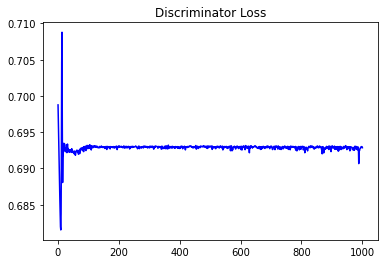

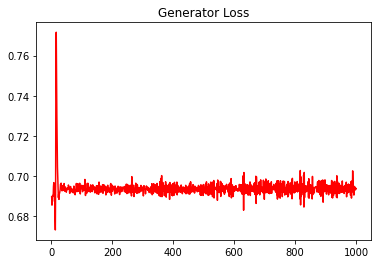

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.007328470141382273


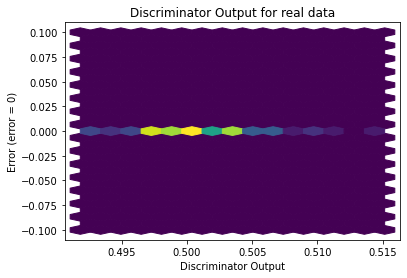

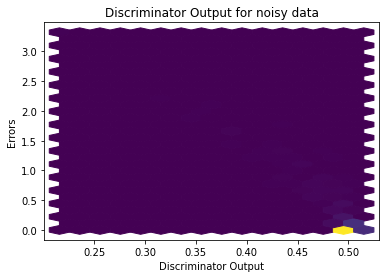

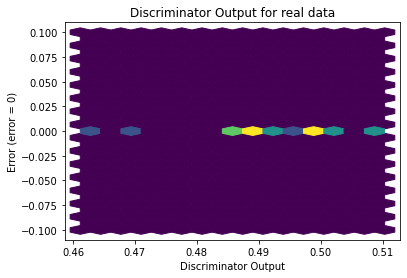

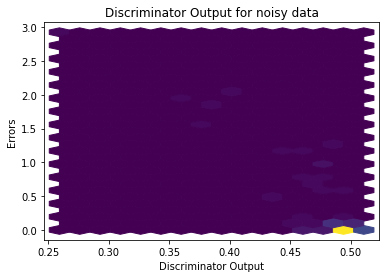

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


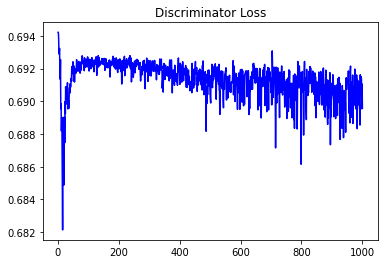

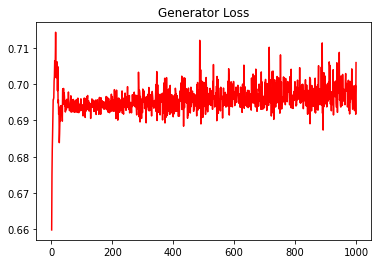

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.009597377932811074


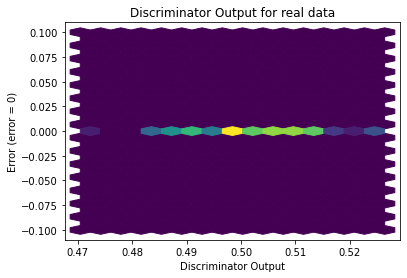

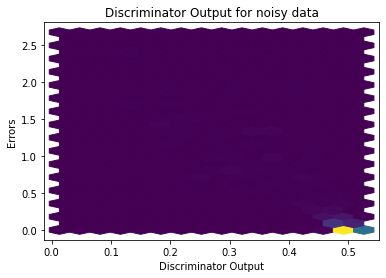

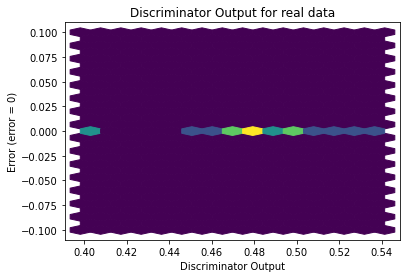

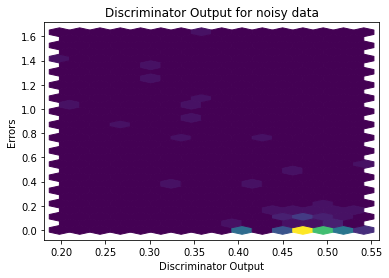

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2533]], requires_grad=True)
